# Introduction

Classification is a type of machine learning problem where the goal is to predict a categorical label for a given input. There are many algorithms that can be used for classification, each with its own strengths and weaknesses. In this notebook, we will cover some common machine learning algorithms for classification and evaluate them.

## Table of Contents


- Prepare the dataset
- ML algorithms:
	1. k-Nearest Neighbors classification (k-NN)
	2. Naïve Bayes Classification (NB)
	3. Decision Tree Classification (DT)
	4. Support Vector Machine Classification (SVM) 
    5. Logistic Regression
- Evaluation metrics

### Preparing the dataset 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Check the null values:**

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data splitting - using percentage split:**

In [4]:
# Define the features and the target class
x = df.drop('Outcome', axis=1)
y = df['Outcome']

**`stratify`**: ensures that the distribution of classes in the original dataset is preserved in the training and testing sets.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

In [6]:
print(y_train.value_counts())

0    400
1    214
Name: Outcome, dtype: int64


In [7]:
print(y_test.value_counts())

0    100
1     54
Name: Outcome, dtype: int64


## k-Nearest Neighbors (k-NN)

K-Nearest Neighbors (K-NN) is a simple, yet powerful classification algorithm that can be used for both binary and multi-class classification problems. The K-NN algorithm works by finding the K closest training examples in the feature space to a given test example, and then assigning the label of the majority class among those K training examples to the test example.

To illustrate how the K-NN algorithm works, let's consider the following binary classification problem where the two classes are denoted by blue and green circles, respectively:

<img src="./images/knn.png">

### How do you decide the number of neighbors (K) in K-NN?

Now, you understand the K-NN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier performance? 

The number of neighbors(K) in K-NN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.
Research has shown that no optimal number of neighbors (K) suits all kind of datasets. Each dataset has it's own requirements. In the case of a small value of neighbors (K) can capture more localized patterns in the data and the noise will have a higher influence on the result. While a large value of neighbors (K) can be more robust to noise in the data and computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.
**Generally, Data scientists choose as an odd number if the number of classes is even.** 

One common approach to selecting the optimal value of K is to use cross-validation. This involves partitioning the data into training and validation sets, fitting the K-NN model with different values of K on the training set, and then evaluating the performance of the model on the validation set. The value of K that produces the best performance on the validation set is then chosen as the optimal value of K.

Another approach is to use a grid search, where a range of values for K are evaluated using cross-validation and the optimal value of K is selected based on the performance on the validation set.



**K-Nearest Neighbors has two versions:**

<ol>
    <li>KNeighborsClassifier (Classification)</li>
    <li>KNeighborsRegressor (Regression)</li>
</ol>

K-NN classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Regressor parameters:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

Note:

if you want to use KNeighborsRegressor follow these steps:

<blockquote>
<code>from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5,metric='minkowski')
knn_model.fit(x_train,y_train)
</code>
    
</blockquote>

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [10]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
print('* Training score: %.3f%%' %(knn_model.score(x_train, y_train)*100))
print('* Testing score: %.3f%%' %(knn_model.score(x_test, y_test)*100))

* Training score: 79.153%
* Testing score: 72.727%


## Naïve Bayes Classification 

Naïve Bayes is a probabilistic algorithm commonly used for classification tasks. It is based on Bayes' theorem, which describes the relationship between the probability of a hypothesis given some observed evidence and the probability of that evidence given the hypothesis. Naïve Bayes assumes that the features are conditionally independent given the class label, which simplifies the computation of probabilities and allows the algorithm to work well with high-dimensional datasets.

The formula for Naïve Bayes is as follows:

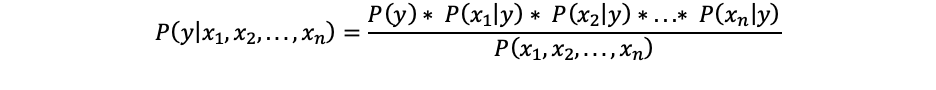
where:
- $P(y│x_1,x_2,...,x_n )$ is the probability of class $y$ given the features $x_1$, $x_2$, $...$, $x_n$.
- $P(y)$ is the prior probability of class $y$.
- $P(x_i|y)$ is the conditional probability of feature $x_i$ given class $y$.
- $P(x_1, x_2, ..., x_n)$ is the prior probability of the features.

Naïve bayes has six versions:
<ol>
    <li>Gaussian Naïve Bayes</li>
    <li>Multinomial Naïve Bayes</li>
    <li>Complement Naïve Bayes</li>
    <li>Bernoulli Naïve Bayes</li>
    <li>Categorical Naïve Bayes</li>
    <li>Out-of-core Naïve Bayes</li>
</ol>

In this notebook, we will use only Gaussian Naïve Bayes.

Gaussian Naïve Bayes parameters:https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
GNB_model = GaussianNB()

In [14]:
GNB_model.fit(x_train, y_train)

GaussianNB()

In [15]:
print('* Training score: %.3f' %(GNB_model.score(x_train, y_train)*100))
print('* Testing score: %.3f' %(GNB_model.score(x_test, y_test)*100))

* Training score: 76.547
* Testing score: 79.870


## Decision Tree Classification

Decision Tree (DT) is a machine learning technique used for classification and regression problems. It creates a tree-like model of decisions and their possible consequences. The decision tree consists of nodes, branches, and leaves, where nodes represent a decision or an attribute, branches represent the outcome of a decision or an attribute, and leaves represent the final output or classification.

In the decision tree, each node represents an attribute, and the edges from the node represent the outcome or possible values of that attribute. The tree is grown recursively by selecting the attribute that provides the most information gain or the best split for the classification. The process continues until all the attributes have been used or the data cannot be split further.

<img src="./images/decision-tree-classification-algorithm.png">

The decision tree can be used for both classification and regression problems. In the classification problem, the tree is used to classify the data into different categories or classes. In the regression problem, the tree is used to predict a continuous value.


Decision tree has two versions:

<ol>
    <li>DecisionTreeClassifier</li>
    <li>DecisionTreeRegressor</li>
</ol>

DecisionTreeClassifier parameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeRegressor parameters:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Note:

If you want to use DecisionTreeRegressor follow these steps:

<blockquote>
<code>from sklearn.neighbors import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
</code>
    
</blockquote>

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt_model = DecisionTreeClassifier()

In [18]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
print('* Training score: %.3f' %(dt_model.score(x_train, y_train)*100))
print('* Testing score: %.3f' %(dt_model.score(x_test, y_test)*100))

* Training score: 100.000
* Testing score: 73.377


## Support Vector Machine Classification

Support Vector Machine (SVM) is a powerful classification algorithm used in machine learning and data mining. It is used for both linear and non-linear classification. The basic idea behind SVM is to find the hyperplane that best separates the data points into different classes.

The SVM algorithm works by mapping the data points to a high-dimensional feature space and finding the hyperplane that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the closest data points from each class. The hyperplane is selected in such a way that it classifies the data points into different classes with maximum possible margin.

<img src="./images/svm.png">

Moreover, SVM can be used for both classification and regression tasks. SVM classification aims to find the hyperplane that best separates the data points into different classes, while SVM regression aims to find the hyperplane that best fits the data points.

In SVM classification, the algorithm tries to maximize the margin between the hyperplane and the nearest data points of each class. The hyperplane is chosen in a way that the distance between the hyperplane and the nearest data points (called support vectors) is maximized. The algorithm then classifies the new data point based on which side of the hyperplane it falls on.

In SVM regression, the algorithm tries to find a hyperplane that best fits the data points. The hyperplane is chosen in a way that it minimizes the distance between the hyperplane and the data points. The algorithm then predicts the output for new data points based on the position of the hyperplane.


SVM has two versions:

<ol>
    <li>Support Vector Classification (SVC)</li>
    <li>Support Vector Regression (SVR) </li>
</ol>

Support Vector Classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Support Vector Regression parameters: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html


Note:

If you want to use SVR follow these steps:

<blockquote>
<code>from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train,y_train)
</code>
    
</blockquote>




In [20]:
from sklearn.svm import SVC

In [21]:
svc_model = SVC()

In [22]:
svc_model.fit(x_train,y_train)

SVC()

In [23]:
print('* Training score: %.3f' %(svc_model.score(x_train, y_train)*100))
print('* Testing score: %.3f' %(svc_model.score(x_test, y_test)*100))

* Training score: 77.036
* Testing score: 76.623


## Logistic Regression

Logistic Regression is a machine learning algorithm used for binary classification problems, where the response variable is categorical with two levels, typically labeled as 0 and 1. The goal of logistic regression is to find the best fitting model that predicts the probability of the response variable based on the values of the predictor variables. It assumes a linear relationship between the predictor variables and the logit of the response variable.

The logistic regression model uses the logistic function, also known as the sigmoid function, to estimate the probability of the binary outcome. The sigmoid function outputs a value between 0 and 1, which is interpreted as the probability of the positive class. The logistic regression model estimates the coefficients of the predictor variables to maximize the likelihood of the observed data.

<img src="./images/LR.png">

Logistic regression can be used for both binary classification and multi-class classification problems. In binary classification, the model predicts the probability of a binary outcome. In multi-class classification, the model predicts the probability of each class and selects the class with the highest probability.

LogisticRegression parameters: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_model = LogisticRegression()

In [26]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [27]:
print('* Training score: %.3f' %(lr_model.score(x_train, y_train)*100))
print('* Testing score: %.3f' %(lr_model.score(x_test, y_test)*100))

* Training score: 77.524
* Testing score: 77.922


# Evaluation Metrics

**This notebook will cover the following model evaluation metrics for the Classification Algorithm:**
1. Confusion Matrix
2. Metrics computed from a confusion matrix (Classification Accuracy, Recall, Precision, F1 Score)
3. ROC Curves and Area Under the Curve (AUC)

## Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

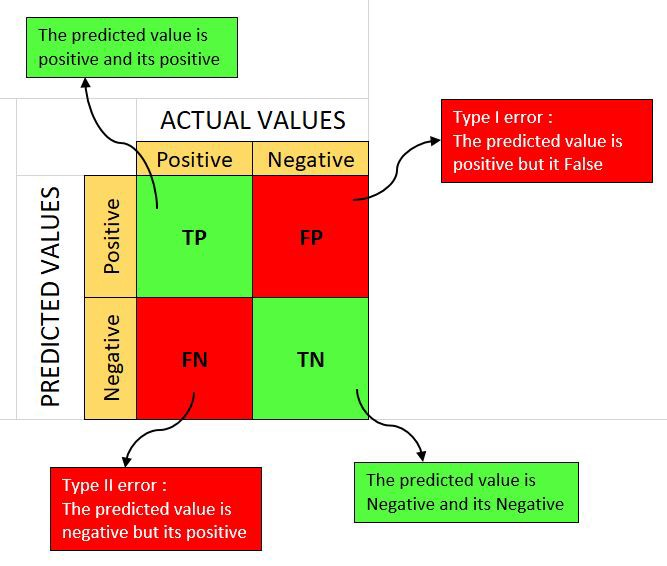

<ol>
    <li>A good model is one which has high TP and TN rates, while low FP and FN rates.</li>
    <li>If you have an imbalanced dataset to work with, it’s always better to use confusion matrix as your evaluation criteria for your machine learning model.</li>
</ol>

### Understanding Confusion Matrix:

- True Positives (TP): when the actual value is Positive and predicted is also Positive.
- True negatives (TN): when the actual value is Negative and prediction is also Negative.
- False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error
- False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

### Understanding Confusion Matrix in an easier way:

Let’s take an example:
We have a total of 20 cats and dogs and our model predicts whether it is a cat or not.

Actual values = [‘dog’, ‘cat’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’]

Predicted values = [‘dog’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘cat’, ‘cat’, ‘cat’, ‘dog’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’]

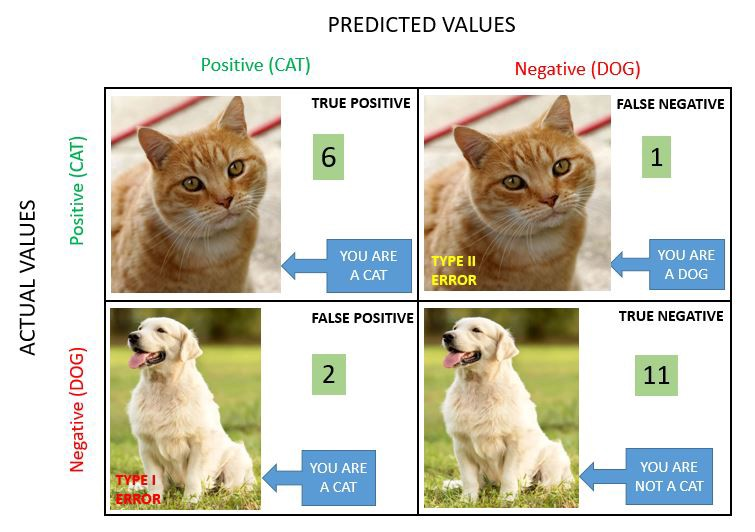

>True Positive (TP) = 6

You predicted positive and it’s true. You predicted that an animal is a cat and it actually is.

>True Negative (TN) = 11

You predicted negative and it’s true. You predicted that animal is not a cat and it actually is not (it’s a dog).

>False Positive (Type 1 Error) (FP) = 2

You predicted positive and it’s false. You predicted that animal is a cat but it actually is not (it’s a dog).

>False Negative (Type 2 Error) (FN) = 1

You predicted negative and it’s false. You predicted that animal is not a cat but it actually is.

## Accuracy

Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.

The accuracy metric is not suited for imbalanced classes. Accuracy has its own disadvantages, for imbalanced data, when the model predicts that each point belongs to the majority class label, the accuracy will be high. But, the model is not accurate.

Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or there is no class imbalance.

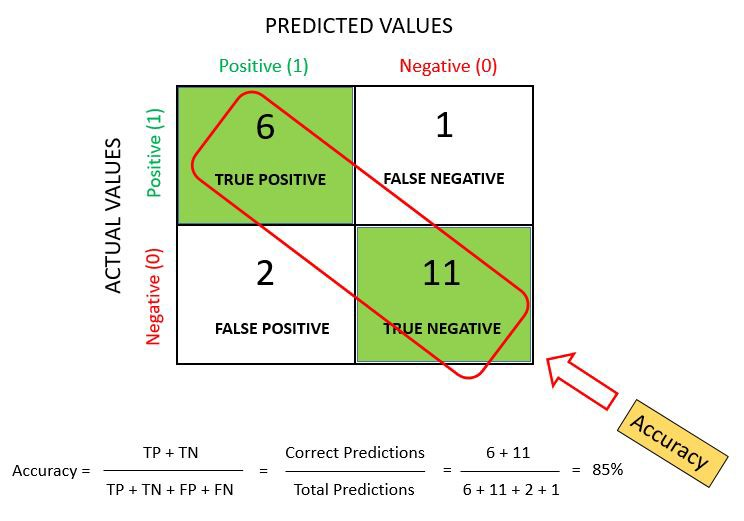

### Precision

It is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predicted.

“Precision is a useful metric in cases where False Positive is a higher concern than False Negatives”

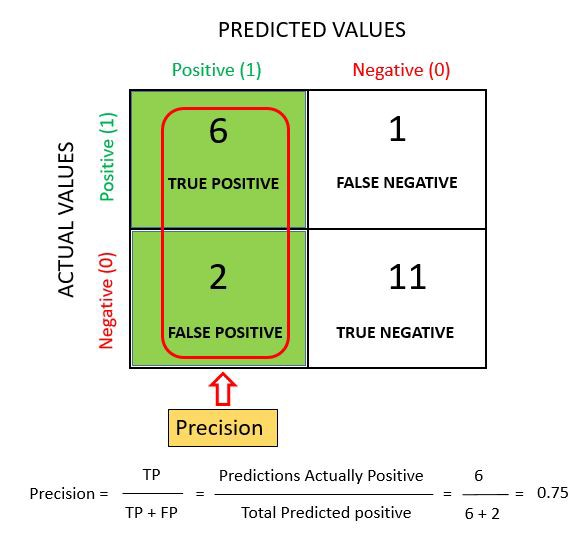

>Ex 1:- Spam Detection : Need to focus on precision.
Suppose mail is not a spam but model is predicted as spam : FP (False Positive). We always try to reduce FP.

### Recall

It is a measure of actual observations which are predicted correctly, i.e. how many observations of positive class are actually predicted as positive.Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.

“Recall is a useful metric in cases where False Negative trumps False Positive”

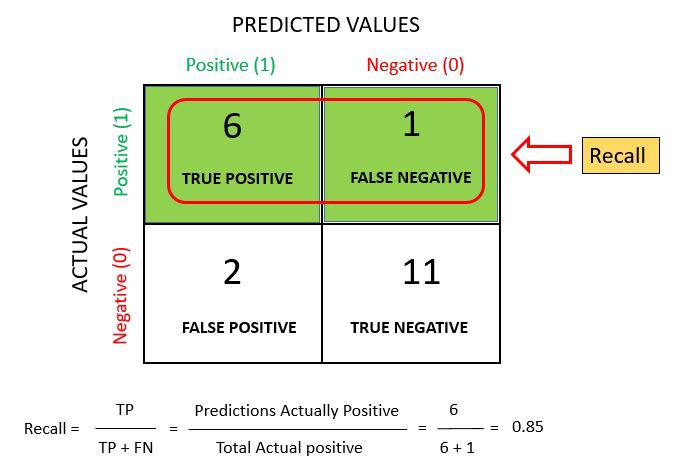

>Ex 1:- Suppose person having cancer (or) not? He is suffering from cancer but model predicted as not suffering from cancer.

>Ex 2:- Recall is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

### F-measure / F1-Score


The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall.

F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.

In practice, when we try to increase the precision of our model, the recall goes down and vice-versa. The F1-score captures both the trends in a single value.

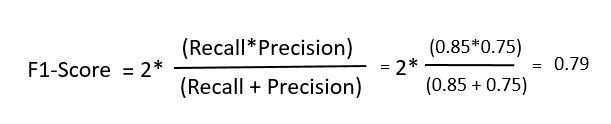



## Is it necessary to check for recall (or) precision if you already have a high accuracy?

We can not rely on a single value of accuracy in classification when the classes are imbalanced. For example, we have a dataset of 100 patients in which 5 have diabetes and 95 are healthy. However, if our model only predicts the majority class i.e. all 100 people are healthy even though we have a classification accuracy of 95%.

### When to use Accuracy / Precision / Recall / F1-Score?
a. Accuracy is used when the True Positives and True Negatives are more important. Accuracy is a better metric for Balanced Data.

b. Whenever False Positive is much more important use Precision.

c. Whenever False Negative is much more important use Recall.

d. F1-Score is used when the False Negatives and False Positives are important. F1-Score is a better metric for Imbalanced Data.

## What is ROC?

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two.

Let’s assume we have a model which predicts whether the patient has a particular disease or no. The model predicts probabilities for each patient (in python we use the“ predict_proba” function). Using these probabilities, we plot the distribution as shown below:

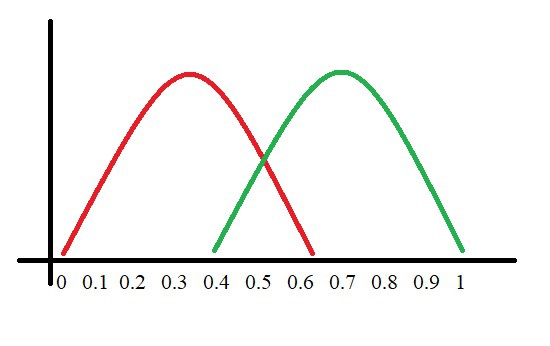

Here, the red distribution represents all the patients who do not have the disease and the green distribution represents all the patients who have the disease.

Now we got to pick a value where we need to set the cut off i.e. a threshold value, above which we will predict everyone as positive (they have the disease) and below which will predict as negative (they do not have the disease). We will set the threshold at “0.5” as shown below:

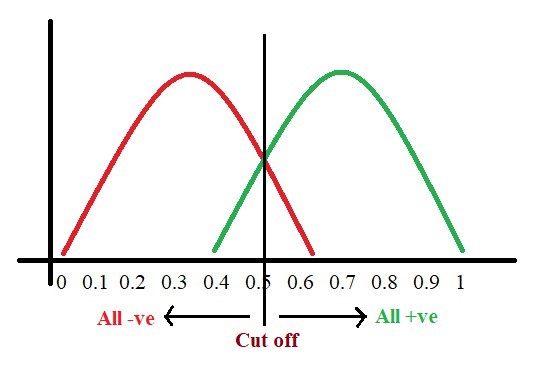

All the positive values above the threshold will be “True Positives” and the negative values above the threshold will be “False Positives” as they are predicted incorrectly as positives.

All the negative values below the threshold will be “True Negatives” and the positive values below the threshold will be “False Negative” as they are predicted incorrectly as negatives.

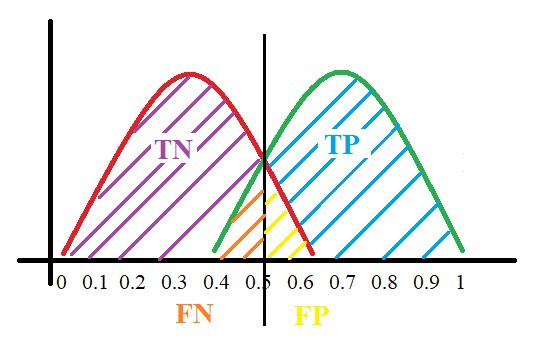

### Area Under the Curve

The AUC is the area under the ROC curve. This score gives us a good idea of how well the model performances.
Let’s take a few examples

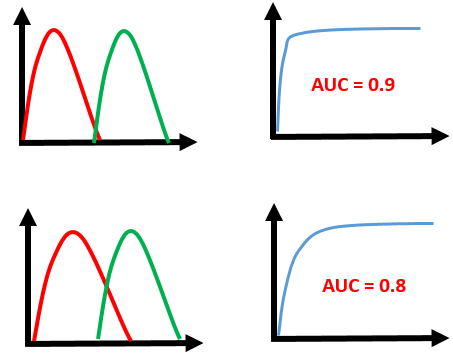

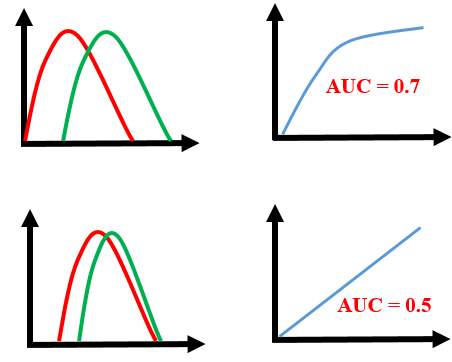

As we see, the first model does quite a good job of distinguishing the positive and the negative values. Therefore, there the AUC score is 0.9 as the area under the ROC curve is large.

Whereas, if we see the last model, predictions are completely overlapping each other and we get the AUC score of 0.5. This means that the model is performing poorly and it is predictions are almost random.

## Evaluation metrics in Python

We will use Knn_model to print all the Evaluation metrics.

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [29]:
y_pred = knn_model.predict(x_test)

In [30]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

Accuracy:  0.7272727272727273
Recall:  0.5370370370370371
Precision:  0.6304347826086957
F1-Score:  0.5800000000000001


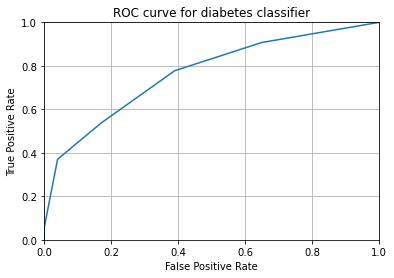

In [31]:
y_pred_prob = knn_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [32]:
print("AUC Score:",roc_auc_score(y_test, y_pred_prob))

AUC Score: 0.7649999999999999
